# Automation Workflow Tutorial <a class="tocSkip">

This notebook contains an interactive introduction to the Python DapticsClient class,
a simplified interface for accessing the Daptics GraphQL API for the optimization of
experimental design.

Documentation for using the DapticsClient class (implemented in the daptics_client.py
file in this folder) is included as comment lines in the interactive Python cells of
this notebook.

For additional help or information, please visit or contact Daptics.

On the web at https://daptics.ai
By email at support@daptics.ai

Daptics API Version 0.15.1
Copyright (c) 2024 Daptics Inc.

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), the rights to use, copy, modify, merge, publish, and/or distribute, copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

You do not have the right to sub-license or sell copies of the Software.

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## Installation <a class="tocSkip">

Before running this project, please make sure that your Jupyter Python environment supports Python 3, and has these required packages installed:
*   chardet
*   urllib3
*   requests
*   gql
*   pandas    

You will also need a validated user account on the Daptics API server.  You should have this; mail `n@3852.ai` if you have difficulty logging in.

See the **01_README.ipynb** notebook in this folder for more information on installing necessary modules
to work with the Daptics API.

Review the **02_Terminology.ipynb** notebook to gain an understanding of how Daptics works, and
way you set up the engine using experimental space parameters.

The next cell gives an example of the information necessary to connect, log in, create a session,
and define the "experimental space" for your campaign.

In [ ]:
# Set up the API client environment.
# Requirements are Python 3, and the `gql` and `requests` libraries.

# Import required classes from the daptics_client package.
from daptics_client import DapticsClient, DapticsTaskType, DapticsExperimentsType
from datetime import datetime
import json
import os.path
import pandas
import pandas as pd
import urllib3

urllib3.disable_warnings()

## Setup<a class="tocSkip">

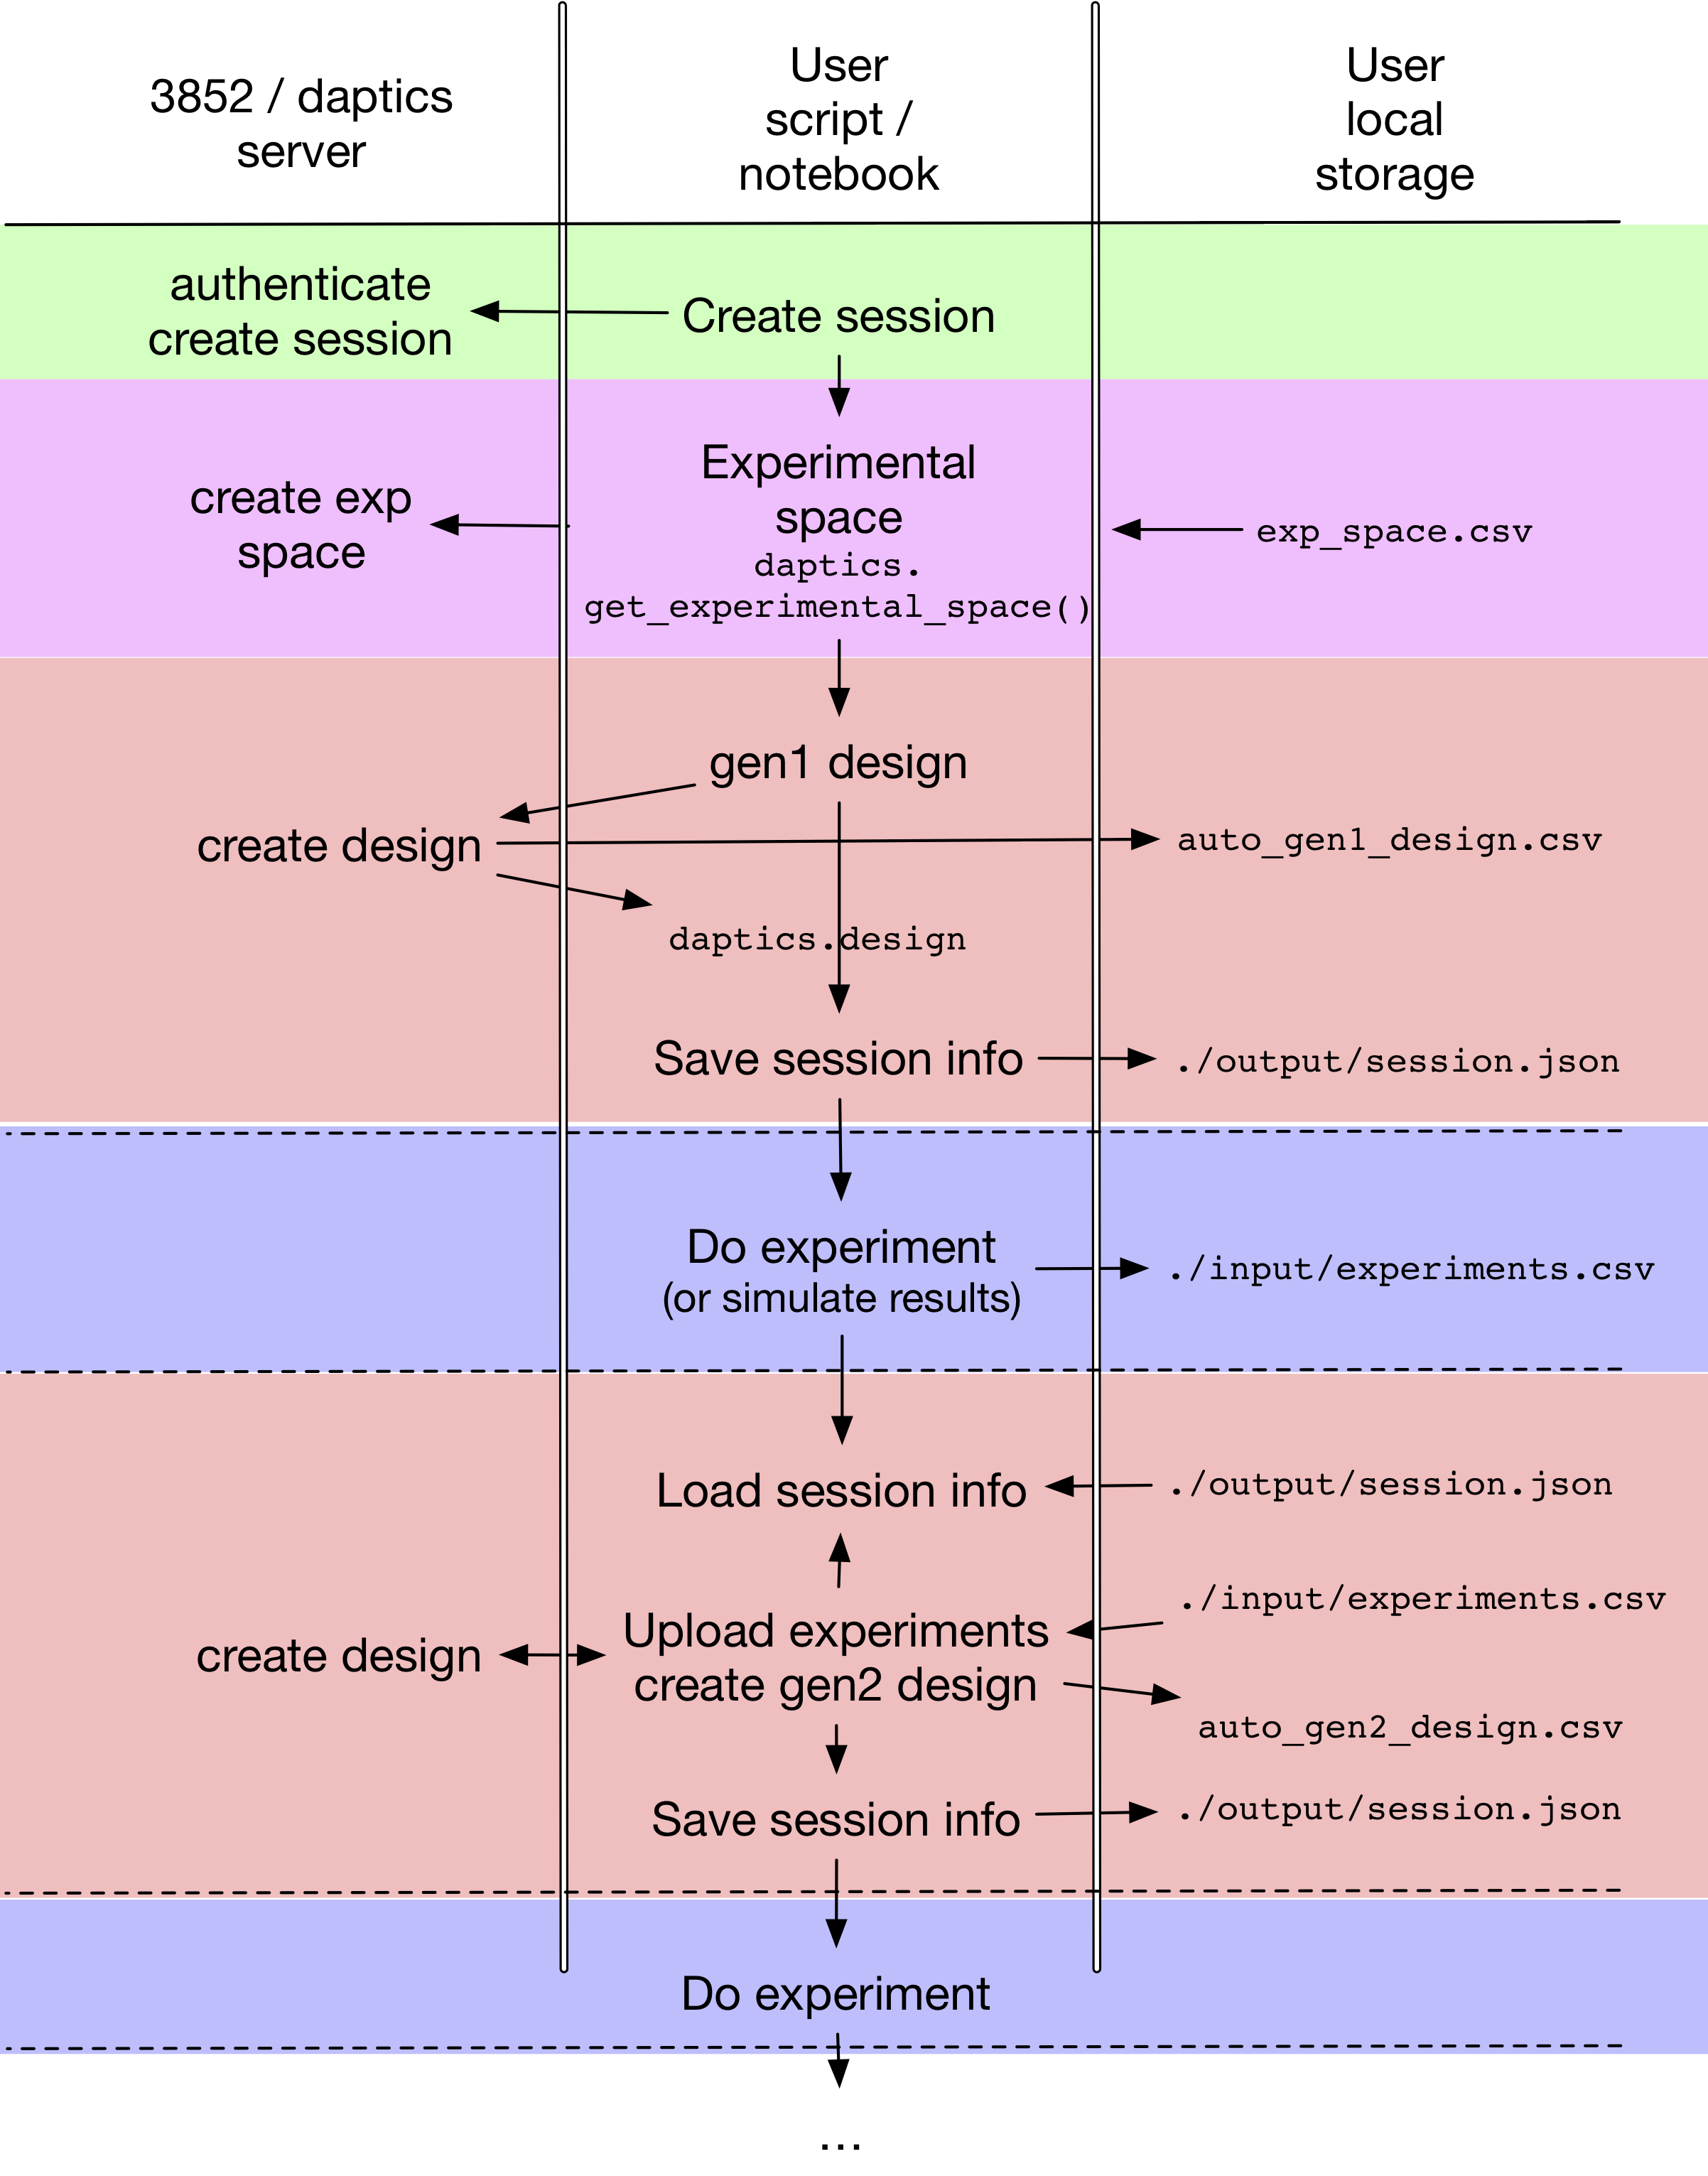![image.png](images/overview.png)

The daptics python API documentation is [here](https://protolife.github.io/daptics-api/)

## Creating a session <a class="tocSkip">

For a fresh session, remove everything in the `output` directory.  If you want to save the results of a previous session, move the output directory and create a new empty output directory.

In [ ]:
!rm -rf output/*

The steps are:  
* connect to the API server
* log in
* create a session for your experimental campaign

#### Setup variables <a class="tocSkip">

In [ ]:
# Initialize values for all variables that will be used to
# connect to the Daptics API and perform automated design of
# experiments via CSV files.

# The URL for the API server.
api_host_url = 'https://api.daptics.ai'

# The credentials for an active Daptics account.
# Please contact sales@daptics.ai for information on
# how to obtain an account.
email = 'YOUR_EMAIL@YOUR_DOMAIN'
password = 'YOUR_PASSWORD'

email = 'david.lynch@strateos.com'
password = 'hamper-garment-sculpture-prewar-vendetta'
email = 'n@protolife.com'
password = 'cplex.1.Protolife'

# You will store the session unique identifier and the generation
# number for the last design in a file that your automation workflow
# software can read. The values in this file will let the automation
# software pick up the appropriate design file.
session_file = './output/session.json'

# The location where Daptics will create CSV files for designed
# experiments.
output_path = './output'


# Configuration options used for automated processing.
auto_options = {
    # Create CSV files at each step in this directory.
    'auto_export_path': output_path,
    # Let long-running tasks execute for up to one hour.
    'auto_task_timeout': 3600,
    # Automatically generate the next design when results are uploaded.
    'auto_generate_next_design': True
}

# With all the Python requirements satisfied, and using the variables
# previously defined, you can go ahead and generate your first
# experimental design generation.

# Initialize values for additional variables that will be used to
# create a Daptics session for your workflow and generate an
# initial design.

#### Connect to server <a class="tocSkip">

In [ ]:
# Create a Python client instance, connecting to the beta API server.
daptics = DapticsClient(api_host_url)

# Set up the options that will fully automate client processing.

In [ ]:
daptics.options = auto_options

# The 'connect' method will connect to the API server and obtain the
# GraphQL schema.

daptics.connect()

In [ ]:
daptics.print()

The daptics python API has documentation [here](https://protolife.github.io/daptics-api).

#### Login to server <a class="tocSkip">

In [ ]:
# Log into the API using your Daptics account credentials.
daptics.login(email, password)

#### Create session <a class="tocSkip">

In [ ]:
# Identify the session. Typically, your workflow software will
# have a unique identifier that can be used as the session
# name. If not, here's a way to make a unique name for your session.
session_name = datetime.now().strftime('Automated Workflow %Y%m%d-%H%M%S')

# A description for the session
session_description = 'Fully automated example'

# Now you can connect to the API, create a session, set up the
# experimental space for your campaign, and generate the first
# design of experiments.

In [ ]:
# Create a new 'session' for this experimental campaign.
print('session_name = ',session_name)
print('session_description = ',session_description)
print('Creating the session {}.'.format(session_name))
session_info = daptics.create_session(session_name, session_description)

In [ ]:
session_info

## Creating the experimental space <a class="tocSkip">

In [ ]:
!cat input/experimental_space.csv

In [ ]:
!ls input

In [ ]:
# The location of the CSV file that defines the names and possible
# values for each input parameter for an individual experiment.

#csv_space_file = './input/combo33.csv' #needs to be fixed...
csv_space_file = './input/experimental_space.csv'
#csv_space_file = './input/esd-factorial-8x5.csv'

# The location of the CSV file that your automation workflow software
# will create after performing all the experiments in a Daptics-
# generated design and adding the Response value for each
# experiment.

csv_experiments_file = './input/experiments.csv'




With modules and variables set up, you must place a CSV file that
defines the names and possible values for each input parameter
that will be used in your experiemnts. This should be saved to a
CSV file at the location specified in the `csv_space_file` variable.

Once this file is there, you can use the session created above by logging in, and have Daptics
generate a first batch of experiments for the automation workflow
software to perform and assay.

When you run the next cell, you should see task retry progress
messages, for the validation of the space and for the creation
of the first generation design. The process should take about
a minute if you use the example `experimental_space.csv` file
in this repository.

In [ ]:
!cat {csv_space_file}

In [ ]:
myspace = pandas.read_csv(csv_space_file,header=None)

myspace.head()

In [ ]:
# The experimental meta-parameters that define the type of experiment
# campaign you will be doing, and the number of experiments that will
# be explored at each gneration. The combination of these meta-
# parameters and the definition of the input parameters is called the
# "experimental space" for the campaign.
space_params = {
    # The 'factorial' experimental space type is used for
    # unconstrained input parameters.
    'space': { 'type': 'factorial' },
    #'space': { 'type': 'sparsefactorial' },
    #'sparseCombMaxSize': 6,
    # Each design generated will contain 30 independent experiments.
    'populationSize': 100,
    # And will have 2 copies of these experiments, so the total
    # number of experiments to be performed at each generation will
    # be 100 * 3 = 300.
    'replicates': 2
}

In [ ]:
print('Creating the experimental space. This may take a minute or more.')

# Upload the CSV file containing the names and possible values for
# each experimental input parameter, and set other meta-parameters,
# to completely initialize the Daptics engine for this campaign.
space_info = daptics.put_experimental_parameters_csv(csv_space_file, space_params)

# Because the `auto_task_timeout` option was set, the Python script
# will block here, until the space has been validated and set up.

# Now the Daptics engine is set up. At this point, if you have any
# initial experiments that have been performed by your workflow,
# instead of calling `daptics.generate_design()`, you can upload
# these experiments from a CSV that your automation workflow software
# has created, containing the input parameter and the response values
# for each of these "initial experiments".

In [ ]:
space_info

## Generating the First Design <a class="tocSkip">

#### Optional:  upload initial experiments <a class="tocSkip">
    
These  could be from previous runs, calibration runs, etc.

In [ ]:
# Here is how you would be use the API to upload initial experiments:
# daptics.put_experiments_csv(
#    DapticsExperimentsType.INITIAL_EXTRAS_ONLY,
#    csv_experiments_file)

#### Generate design <a class="tocSkip">

In [ ]:
print('Creating an initial design. This may take a minute or more.')

# If you have no initial experiments to upload, you will just
# ask Daptics to generate the first design.
my_design = daptics.generate_design()

Because the `auto_task_timeout` and `auto_generate_next_design`
options were set in the client, if either the `put_experiments_csv`
or `generate_design` methods were called, the Python script will
block here until the design for the first generation has completed.

Because the `auto_export_path` option was set, when the design
has been generated, it will have been saved into a CSV file at
`./output/auto_gen1_design.csv`, ready for your workflow software
to read.

In [ ]:
# The name of the automatically generated design file is constructed
# using the pattern shown here.
#gen = daptics.gen
#csv_design_file = os.path.join(
#    output_path, 'auto_gen{}_design.csv'.format(gen))

In [ ]:
!ls output

#### Save session data <a class="tocSkip">

In [ ]:
# Before this script exits, you must save the session id, generation
# number and design file location, so that the automation software
# can later read the design and reconnect to the session to upload
# the results obtained by peforming the designed experiments.

gen = daptics.gen
csv_design_file = os.path.join(
    output_path, 'auto_gen{}_design.csv'.format(gen))
session_data = {
    'session_id': daptics.session_id,
    'gen': gen,
    'csv_design_file': csv_design_file
}

## Save session data for re-opening session later
with open(session_file, 'wt') as f:
    json.dump(session_data, f)

print('All done. Generation {} design is now available in output directory.'.format(gen))

#### Check out the results<a class="tocSkip">

In [ ]:
!ls output

In [ ]:
!head output/auto_gen1_design.csv

In [ ]:
gen1 = pandas.read_csv('output/auto_gen1_design.csv')

In [ ]:
gen1.head()

In [ ]:
gen1.shape

## In the Loop: Perform Experiments <a class="tocSkip">

After the initial design is generated, the automation workflow software
will read the input parameters from the file `auto_gen1_design.csv`
in the directory specified by the Python variable `output_path`.
Each row in the CSV file represents a unique experiment, with the
values specified for each input parameter in the column with the
parameter's name.

The workflow software must convert these input parameter names and
values into an experimental workflow, mapping inputs to plate wells,
pipetting appropriate reagents, performing incubation and
filtration, etc., and finally conducting assays.
The workflow software must also convert the assay results
from each experiment into a single target number, called the
experiment "Response". This is the number that the Daptics AI will optimize.

The workflow software must add these responses to the Daptics-generated
design file. The response to each experiment should be written into the `Response`
column of the CSV file in the row that corresponds to the experiment.
The CSV file is saved to the location specified in the `csv_experiments_file`
Python variable: `./input/experiments.csv`.

**It is very important to make sure that the measured Responses from the experimental assay are aligned with the experimental design that produced the response.**

In [ ]:
# This client method returns the validated experimental
# space for the session, as a Python `dict`.
space = daptics.get_experimental_space()

# The client's `design` attribute should contain the last
# design generated:
design = daptics.design

In [ ]:
design

This design should be exactly the same as the one read in above with the call:
```
gen1 = pandas.read_csv('output/auto_gen1_design.csv')
```

In [ ]:
gen1 = pandas.read_csv('output/auto_gen1_design.csv')
gen1.head()

#### Random / simulated responses <a class="tocSkip">

If you don't have real experimental results, you can run the next
cell to create a valid experiments file, filled with random responses,
at the `csv_experiments_file` location.

In [ ]:
# Simulate experiments by filling in random responses.

# This code expects that the `daptics` client is still connected
# to the API and that the `session_data` variable has been
# initialized or updated after the previous design generation.
# If these variables are not set up, you will have to reconnect
# to the API as in the next code cell below.

In [ ]:
experiments = daptics.random_experiments_with_responses(space,design)

In [ ]:
experiments

The random experiments may be overwritten with results from the synthetic data generator:

In [ ]:
expsim = daptics.simulate_experiment_responses(experiments)

In [ ]:
expsim

In [ ]:
# Use this client utility method to save the experiments
# with random responses to location that will be used by the next code cell.
daptics.export_csv(csv_experiments_file, expsim['simulateResponses']['table'], True)

print('Simulated random experiment responses saved in',csv_experiments_file,'.')

## In the Loop: Design Next Generation<a class="tocSkip">

Once an experiments file has bee put into the `csv_experiments_file`
location, you can execute the next part of the Daptics process,
simply uploading the experiments and their responses and generating the
next design. To do so you must reconnect to the session using the
`session_id` value saved previously. Once reconnected, the only
API call necessary is to upload the experiments.

When you run the next cell, you should see task retry progress
messages, for the incorporation of the experiments into the
model, and for the creation of the next generation design.
These processes should take about a minute, but could take longer
for more complicated experimental spaces.

#### Reconnect session<a class="tocSkip">

In [ ]:
# Design the next generation by reading in the experiments
# saved in the `csv_experiments_file`.

# If you put this code into a separate script for your automation
# workflow engine, make sure to include code from the first Python
# cell in this tutorial that contains the imports and variables used
# here.

# To begin you reload the session data you saved when you generated
# the previous design.
with open(session_file, 'rt') as f:
    session_data = json.load(f)

# You follow the same connect and login procedure as for the first
# design, then reconnect to your session.

# Create a Python client instance, connecting to the beta API server.
daptics = DapticsClient(api_host_url)

# Set up the options that will fully automate client processing.
daptics.options = auto_options

# The 'connect' method will connect to the API server and obtain the
# GraphQL schema.
daptics.connect()

# Log into the API using your Daptics account credentials.
daptics.login(email, password)

print('Reconnecting to session {}.'.format(session_data['session_id']))

# Reconnect to the session after logging in. Here you rely
# on the 'session_id' value saved in the session file.
daptics.reconnect_session(session_data['session_id'])

#### Upload experiment responses<a class="tocSkip">

In [ ]:
print('Uploading experiments and creating a design.')
print('This may take a minute or more.')

# Upload the experiments file that your automation workflow software
# created, containing the previous design and the response values
# for each experiment in the design.
newgen = daptics.put_experiments_csv(
    DapticsExperimentsType.DESIGNED_WITH_OPTIONAL_EXTRAS,
    csv_experiments_file)

As before:

Because the `auto_task_timeout` and `auto_generate_next_design`
options were set in the client, if either the `put_experiments_csv`
or `generate_design` methods were called, the Python script will
block here until the design for the first generation has completed.

Because the `auto_export_path` option was set, when the design
has been generated, it will have been saved into a CSV file at
`./output/auto_gen1_design.csv`, ready for your workflow software
to read.

In [ ]:
# Before this script exits, you again save the session id, generation
# number and design file location, to make this updated information
# available to the workflow software.

# The name of the automatically generated design file is constructed
# using the pattern shown here.
gen = daptics.gen
csv_design_file = os.path.join(
    output_path, 'auto_gen{}_design.csv'.format(gen))
session_data = {
    'session_id': daptics.session_id,
    'gen': gen,
    'csv_design_file': csv_design_file
}
with open(session_file, 'wt') as f:
    json.dump(session_data, f)

print('Generation {} design is now available in output directory.'.format(gen))

# Now the workflow software can read the design file, execute more
# experiments, and continue the loop. You can exit the script now.

In [ ]:
!ls output

#### Do another generation<a class="tocSkip">

In [ ]:
!head output/auto_gen2_design.csv

In [ ]:
daptics.design

In [ ]:
# Do the experiment:
# simulated experimental response
space = daptics.get_experimental_space()
design = daptics.design
experiments = daptics.random_experiments_with_responses(space, design)
expsim = daptics.simulate_experiment_responses(experiments)
daptics.export_csv(csv_experiments_file, expsim['simulateResponses']['table'], True)
print('Simulated random experiment responses saved in',csv_experiments_file,'.')

In [ ]:
expsim

In [ ]:
newgen = daptics.put_experiments_csv(
    DapticsExperimentsType.DESIGNED_WITH_OPTIONAL_EXTRAS,
    csv_experiments_file)

In [ ]:
!ls output

#### Do another generation<a class="tocSkip">

In [ ]:
!head output/auto_gen3_design.csv

In [ ]:
daptics.design

In [ ]:
# Do the experiment:
# simulated experimental response
space = daptics.get_experimental_space()
design = daptics.design
experiments = daptics.random_experiments_with_responses(space, design)
expsim = daptics.simulate_experiment_responses(experiments)
daptics.export_csv(csv_experiments_file, expsim['simulateResponses']['table'], True)
print('Simulated random experiment responses saved in',csv_experiments_file,'.')

In [ ]:
expsim

In [ ]:
newgen = daptics.put_experiments_csv(
    DapticsExperimentsType.DESIGNED_WITH_OPTIONAL_EXTRAS,
    csv_experiments_file)

In [ ]:
!ls output

## Analytics <a class="tocSkip">

In [ ]:
# You can optionally generate analytics graphs at each step of
# the loop. These PDF files can then be picked up by automation
# software and included in your lab notebook, etc.

print('Generating analytics files.')

# Generate any analytics files that are available for this generation.
# Since the `auto_task_timeout` option has been set, the script will
# block until the files are ready to be downloaded.
daptics.generate_analytics()

print('Downloading analytics files.')

# Fetch the PDF analytics files via authenticated HTTP, and save them
# to the './output' directory, where your automation workflow
# software can pick them up.
daptics.download_all_analytics_files(daptics.analytics, output_path, name_by_gen=True)

print('Generation {} analytics are now available in output directory.'.format(gen))

In [ ]:
!ls output_